고객이 bank account를 계속 사용할 것인지 해지할 것인지 예측하는 모델  
**피처 설명**  
1. id
2. CustomerId : 각 고객에 대한 고유 식별자
3. Surname : 고객의 성 또는 이름
4. CreditScore : 고객의 신용 점수를 나타내는 숫자 값
5. Geography : 고객이 거주하는 국가(프랑스, 스페인 또는 독일)
6. Gender : 고객의 성별(남성 또는 여성)
7. Age : 고객의 나이
8. Tenure : 고객이 은행과 거래한 기간
9. Balance : 고객의 계정 잔액
10. NumOfProducts : 고객이 사용하는 은행 상품 수(예: 예금 계좌, 신용카드)
11. HasCrCard : 고객의 신용카드 보유 여부(1 = yes, 0 = no)
12. IsActiveMember : 고객이 acitve한 회원인지 여부(1 = yes, 0 = no)
13. EstimatedSalary : 고객의 예상 급여
14. Exited : 고객 이탈 여부(1 = yes, 0 = no)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('bank_churn.csv')
test_data = pd.read_csv('bank_churn_test.csv')

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train_data.info()  # 총 165034개의 데이터가 포함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df = train_data.drop(['id', 'CustomerId'], axis=1)
df.describe()

# Age의 평균은 38
# 고객이 은행과 거래한 기간의 평균은 5
# 계좌 잔액의 평균은 165034불(화폐 단위는 추정) 하지만 중앙값이 0인 것을 주목
# 은행 상품 수의 평균은 1.5
# 신용카드 보유의 평균은 0.75
# active member의 평균은 0.5 정도
# 추정 에산의 평균은 112574불, 그나마 비슷한 규모인 Balance와 비교하면 표준편차가 그나마 작다는 걸 알 수 있음
# Exited 평균은 0.21. 즉 이탈률이 20% 정도 -> 직접 확인해보자

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


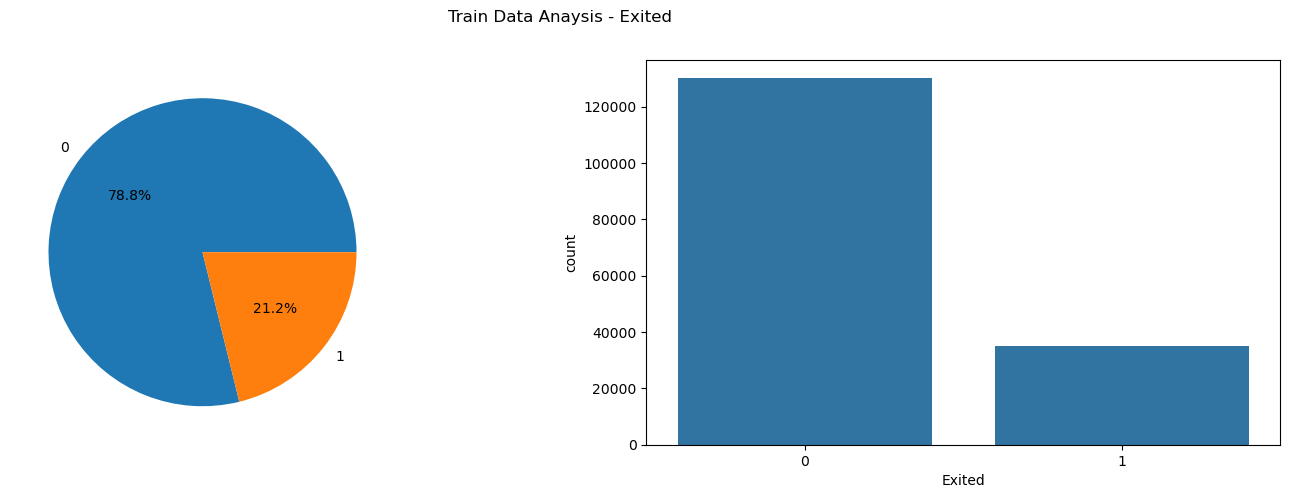

In [6]:
# Exited 시각화
# train data의 레이블 값 분포 plot
f,ax=plt.subplots(1,2,figsize=(18,5)) # 1행 2열의 서브플롯 생성
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
# Exited 열의 값의 분포를 파이 차트로 표현. 첫 번째 서브플롯에 그림. 그림자 효과 추가
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=train_data,ax=ax[1])
# Exited 열의 값에 따른 빈도수를 막대 그래프로 표시
# ax[1].set_title('Count-Plot')
plt.suptitle('Train Data Anaysis - Exited')
plt.show()

실제로 train 데이터셋의 이탈을 한 비율이 21.2%로 나타남  
참고한 velog에는 50대를 기준으로 이탈한 사람들을 분석했으므로 우리는 **40대 사람들**을 분석해 인사이트를 얻고자 함

In [7]:
# 계좌 잔액이 0인 고객은 이탈했다고 볼 수..?
data = df[(df['Balance']!=0)&(df['Age']>=40)&(df['Age']<50)]
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000
mean,656.286498,43.583923,4.973878,121273.590987,1.324626,0.741734,0.428317,113736.667899,0.407635
std,81.380263,2.802043,2.829194,24843.707103,0.563771,0.437691,0.494846,49861.155335,0.491406
min,350.000000,40.000000,0.000000,9904.420000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,41.000000,3.000000,104929.945000,1.000000,0.000000,0.000000,75436.825000,0.000000
50%,657.000000,43.000000,5.000000,121894.340000,1.000000,1.000000,0.000000,118045.980000,0.000000
75%,710.000000,46.000000,7.000000,137714.250000,2.000000,1.000000,1.000000,156909.665000,1.000000
max,850.000000,49.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.000000


**여기서부턴 그냥 딴 생각**  
갑자기 든 생각 -> 계좌 잔액이 0이라는 것은 이 은행 계좌를 사용하지 않는다는 뜻인데 이탈했다고 해도 무방하지 않을까?

In [8]:
# 40대의 계좌 잔액에 관한 데이터 분포 확인을 위해 다시 data 정의
data40 = df[(df['Age']>=40)&(df['Age']<50)]
data40.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000
mean,655.460837,43.392922,5.016413,59694.747815,1.496987,0.748586,0.442808,113558.225562,0.348000
std,79.946349,2.769318,2.812735,63085.827033,0.576631,0.433831,0.496724,50037.306718,0.476341
min,350.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,41.000000,3.000000,0.000000,1.000000,0.000000,0.000000,75578.670000,0.000000
50%,657.000000,43.000000,5.000000,0.000000,1.000000,1.000000,0.000000,119348.680000,0.000000
75%,710.000000,46.000000,7.000000,121537.720000,2.000000,1.000000,1.000000,156485.850000,1.000000
max,850.000000,49.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
# 40대 + Balance가 0인 것을 제외한 데이터 분포 확인
data40s = df[(df['Balance'] !=0) & (df['Age'] >= 50) & (df['Age'] < 60)]
data40s.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000
mean,654.663963,53.715128,4.903716,122206.935370,1.316278,0.729136,0.462843,113112.765506,0.646859
std,81.552685,2.850490,2.836032,24140.105111,0.618806,0.444439,0.498654,50729.000683,0.477981
min,350.000000,50.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,595.000000,51.000000,2.000000,106929.412500,1.000000,0.000000,0.000000,73681.380000,0.000000
50%,653.000000,53.000000,5.000000,122217.105000,1.000000,1.000000,0.000000,119330.745000,1.000000
75%,711.000000,56.000000,7.000000,137236.137500,1.000000,1.000000,1.000000,157391.962500,1.000000
max,850.000000,59.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199775.670000,1.000000


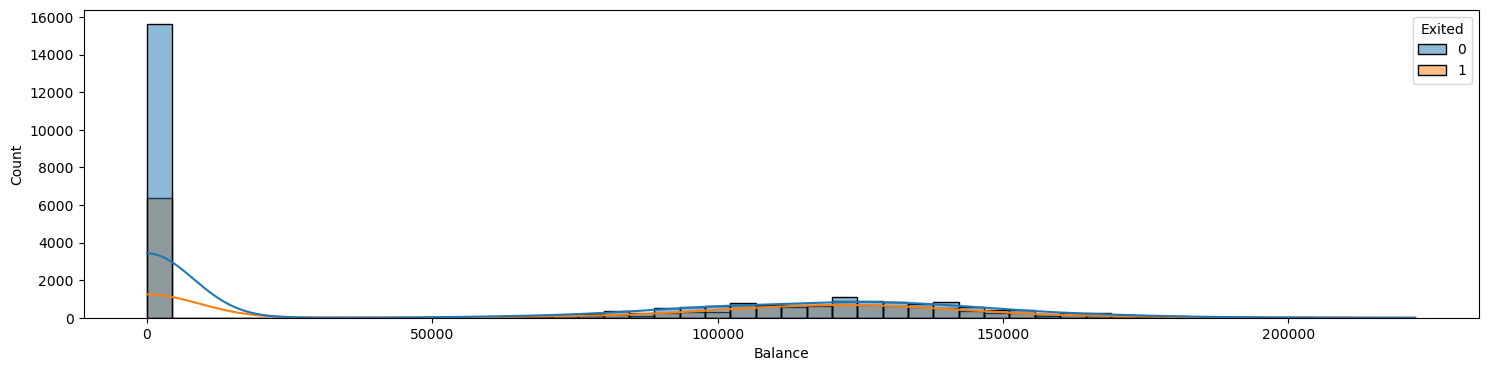

In [10]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=data40, x="Balance", hue="Exited", bins=50, kde=True)
plt.show()

Exited가 0이면 은행 이탈을 하지 않은 건데 계좌 잔액이 0이면 사실상 이탈한 거 아닐까? -> 우선은 계좌 잔액이 0인 것만 count 해보자

In [11]:
# 'Balance' 칼럼에서 값이 0인 데이터의 개수를 확인
balance_zero_count = (data40['Balance'] == 0).sum()

print(balance_zero_count)
print(data40.shape[0])
print(balance_zero_count/data40.shape[0]*100,'%')

21996
43319
50.776795401555894 %


40대의 절반이 계좌 잔액이 0이라는 것을 확인할 수 있음 -> 사실상 이탈하고 다른 은행 계좌나 현금을 보유하고 있다고 가정하자  
그러면 balance가 0인 것도 Exited가 1이 되도록 바꾸자  
를 하고 싶지만 우선 dataset의 원본을 사용하기로 하자... -> 아이디어 제안

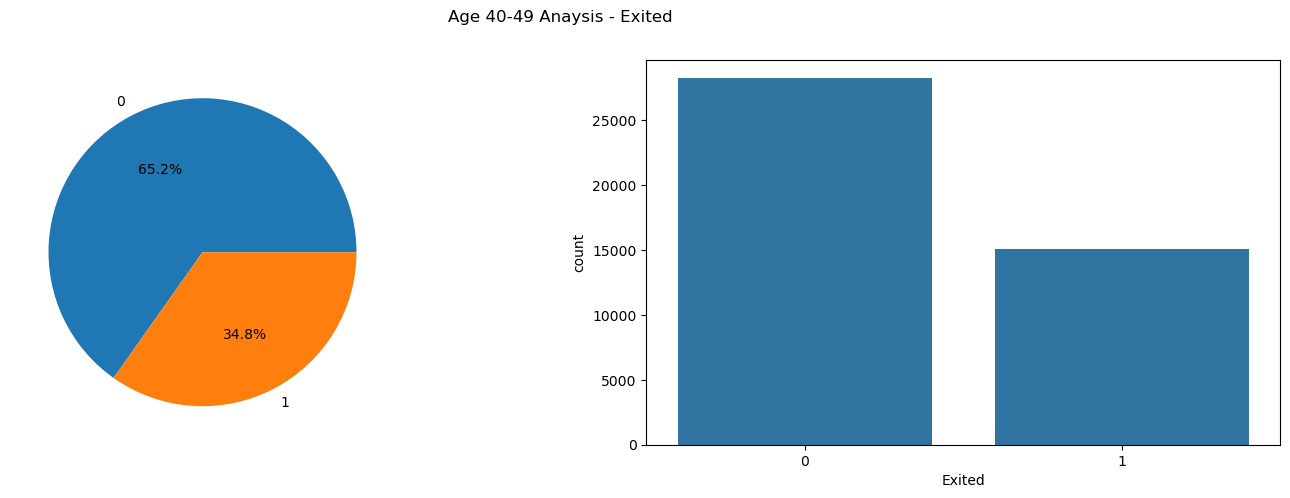

In [12]:
# 40대의 은행 이탈률 시각화
f,ax=plt.subplots(1,2,figsize=(18,5)) # 1행 2열의 서브플롯 생성
data40['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
# Exited 열의 값의 분포를 파이 차트로 표현. 첫 번째 서브플롯에 그림. 그림자 효과 추가
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=data40,ax=ax[1])
# Exited 열의 값에 따른 빈도수를 막대 그래프로 표시
# ax[1].set_title('Count-Plot')
plt.suptitle('Age 40-49 Anaysis - Exited')
plt.show()

40대의 은행 이탈률은 34.8%로 나타남

In [13]:
# 다시 한 번 40대 describe
data40.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000
mean,655.460837,43.392922,5.016413,59694.747815,1.496987,0.748586,0.442808,113558.225562,0.348000
std,79.946349,2.769318,2.812735,63085.827033,0.576631,0.433831,0.496724,50037.306718,0.476341
min,350.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,41.000000,3.000000,0.000000,1.000000,0.000000,0.000000,75578.670000,0.000000
50%,657.000000,43.000000,5.000000,0.000000,1.000000,1.000000,0.000000,119348.680000,0.000000
75%,710.000000,46.000000,7.000000,121537.720000,2.000000,1.000000,1.000000,156485.850000,1.000000
max,850.000000,49.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.000000


**전체에 대한 데이터 설명**  
- Age의 평균은 38
- 고객이 은행과 거래한 기간의 평균은 5
- 계좌 잔액의 평균은 165034불(화폐 단위는 추정) 하지만 중앙값이 0인 것을 주목
- 은행 상품 수의 평균은 1.5
- 신용카드 보유의 평균은 0.75
- active member의 평균은 0.5 정도
- 추정 에산의 평균은 112574불, 그나마 비슷한 규모인 Balance와 비교하면 표준편차가 그나마 작다는 걸 알 수 있음

**40대에 대한 데이터 설명**  
- Age의 평균은 43
- 고객이 은행과 거래한 기간의 평균은 5
- 계좌 잔액의 평균은 59694불(화폐 단위는 추정) 하지만 중앙값이 0인 것을 주목
- 은행 상품 수의 평균은 1.5
- 신용카드 보유의 평균은 0.75
- active member의 평균은 0.45 정도
- 추정 예산의 평균은 113558불

In [14]:
# 50대의 계좌 잔액에 관한 데이터 분포 확인을 위해 다시 data 정의
data50 = df[(df['Age']>=50)&(df['Age']<60)]
data50.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,12186.000000,12186.000000,12186.000000,12186.000000,12186.000000,12186.000000,12186.000000,12186.000000,12186.000000
mean,653.911456,53.721237,4.914738,68013.083512,1.399393,0.733629,0.488511,112652.503429,0.609388
std,81.399903,2.863866,2.815375,63328.454502,0.625747,0.442079,0.499889,51389.078255,0.487908
min,350.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,595.000000,51.000000,3.000000,0.000000,1.000000,0.000000,0.000000,73066.447500,0.000000
50%,653.000000,53.000000,5.000000,92760.550000,1.000000,1.000000,0.000000,118921.535000,1.000000
75%,710.000000,56.000000,7.000000,123978.305000,2.000000,1.000000,1.000000,158041.575000,1.000000
max,850.000000,59.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199862.380000,1.000000


## 40대를 분석할 건데 balance를 포함할 것

In [15]:
# 40대의 계좌 잔액에 관한 데이터 분포 확인을 위해 다시 data 정의
data40 = df[(df['Age']>=40)&(df['Age']<50)]
data40.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000,43319.000000
mean,655.460837,43.392922,5.016413,59694.747815,1.496987,0.748586,0.442808,113558.225562,0.348000
std,79.946349,2.769318,2.812735,63085.827033,0.576631,0.433831,0.496724,50037.306718,0.476341
min,350.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,41.000000,3.000000,0.000000,1.000000,0.000000,0.000000,75578.670000,0.000000
50%,657.000000,43.000000,5.000000,0.000000,1.000000,1.000000,0.000000,119348.680000,0.000000
75%,710.000000,46.000000,7.000000,121537.720000,2.000000,1.000000,1.000000,156485.850000,1.000000
max,850.000000,49.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.000000


## 40대와 칼럼의 상관관계 분석

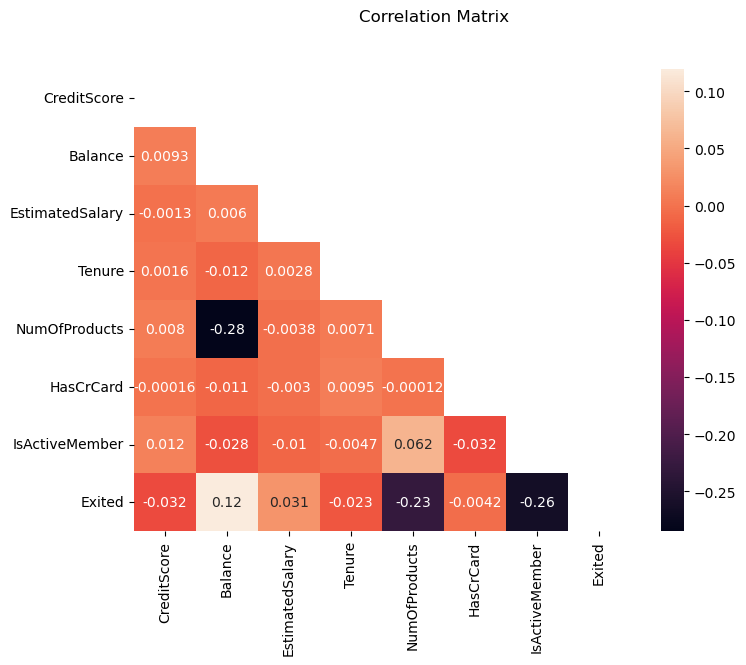

In [16]:
df4 = data40[['CreditScore', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()  # 변수들 사이의 상관 관계 행렬을 계산

mask = np.zeros_like(corr_matrix)  # 상관 관계 행렬과 동일한 크기의 0으로 채워진 배열을 생성해서 히트맵의 상단 삼각형 부분을 숨기는 데 사용
mask[np.triu_indices_from(mask)] = True  # 히트맵에서 상단 삼각형 부분을 숨김

f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

히트맵에 포함되어 있지 않은 'Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'NumOfProducts' 분석 필요  
상관관계가 높은 'NumofProducts', 'IsActiveMember', 'Balance' 분석 필요

## 40대와 지역 분석

<function matplotlib.pyplot.show(close=None, block=None)>

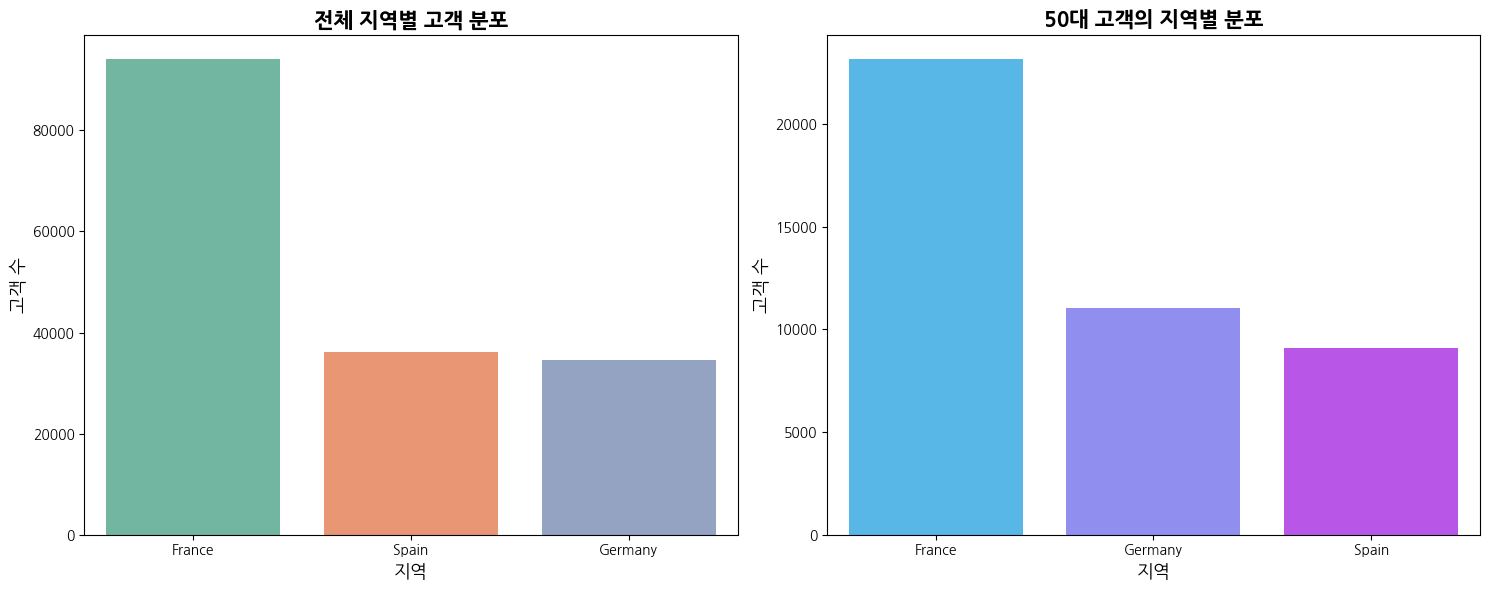

In [17]:
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 
df_e = df[df['Exited'] == 1]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='Geography', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 지역별 고객 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('지역', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='Geography', data=data40, palette='cool', ax=axs[1])
axs[1].set_title('50대 고객의 지역별 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('지역', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

plt.tight_layout()
plt.show

해석 : 50대와는 달리 전체 고객 기준으로 프랑스가 비중이 가장 높은 건 일치  
그냥 전체적으로 비율이 전체와 비슷함

### One-Hot Encoding 적용

In [18]:
data_encoded = pd.get_dummies(df, columns=['Geography',
                                      'Gender',
                                      'IsActiveMember',
                                      'HasCrCard',
                                      'NumOfProducts'])
# Tenure는 너무 많아서 제외
data_encoded.head()

,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,Okwudilichukwu,668,33.0,3,0.00,181449.97,0,True,False,False,False,True,True,False,False,True,False,True,False,False
1,Okwudiliolisa,627,33.0,1,0.00,49503.50,0,True,False,False,False,True,False,True,False,True,False,True,False,False
2,Hsueh,678,40.0,10,0.00,184866.69,0,True,False,False,False,True,True,False,False,True,False,True,False,False
3,Kao,581,34.0,2,148882.54,84560.88,0,True,False,False,False,True,False,True,False,True,True,False,False,False
4,Chiemenam,716,33.0,5,0.00,15068.83,0,False,False,True,False,True,False,True,False,True,False,True,False,False


In [19]:
data40_encoded = pd.get_dummies(data40, columns=['Geography',
                                      'Gender',
                                      'IsActiveMember',
                                      'HasCrCard',
                                      'NumOfProducts'])
# Tenure는 너무 많아서 제외
data40_encoded.head()

,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
2,Hsueh,678,40.0,10,0.00,184866.69,0,True,False,False,False,True,True,False,False,True,False,True,False,False
8,Manna,676,43.0,4,0.00,142917.13,0,True,False,False,False,True,True,False,False,True,False,True,False,False
9,Cattaneo,583,40.0,4,81274.33,170843.07,0,False,True,False,False,True,False,True,False,True,True,False,False,False
11,Chiu,687,40.0,3,90432.92,1676.92,0,False,True,False,False,True,True,False,False,True,True,False,False,False
13,Ts'ai,681,47.0,5,0.00,72945.68,0,True,False,False,False,True,False,True,False,True,True,False,False,False


X_encoded 객체는 원-핫 인코딩이 적용된 '40대' 데이터셋 객체

In [20]:
France_stayed = data40_encoded[(data40_encoded['Geography_France'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
France_exited = data40_encoded[(data40_encoded['Geography_France'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
Germany_stayed = data40_encoded[(data40_encoded['Geography_Germany'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
Germany_exited = data40_encoded[(data40_encoded['Geography_Germany'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
Spain_stayed = data40_encoded[(data40_encoded['Geography_Spain'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
Spain_exited = data40_encoded[(data40_encoded['Geography_Spain'] == True) & (data40_encoded['Exited'] == 1)].shape[0]

print(France_stayed)
print(France_exited)
print(Germany_stayed)
print(Germany_exited)
print(Spain_stayed)
print(Spain_exited)

16572
6632
5197
5833
6475
2610


In [21]:
def calculate_Exited(A, B):
    return B / (A+B) *100

def calculate_Stayed(A, B):
    return A / (A+B) *100

In [22]:
print(calculate_Exited(France_stayed,France_exited))
print(calculate_Stayed(France_stayed,France_exited))
print(calculate_Exited(Germany_stayed, Germany_exited))
print(calculate_Stayed(Germany_stayed, Germany_exited))
print(calculate_Exited(Spain_stayed, Spain_exited))
print(calculate_Stayed(Spain_stayed, Spain_exited))

28.5812790898121
71.4187209101879
52.88304623753399
47.116953762466004
28.72867363786461
71.27132636213538


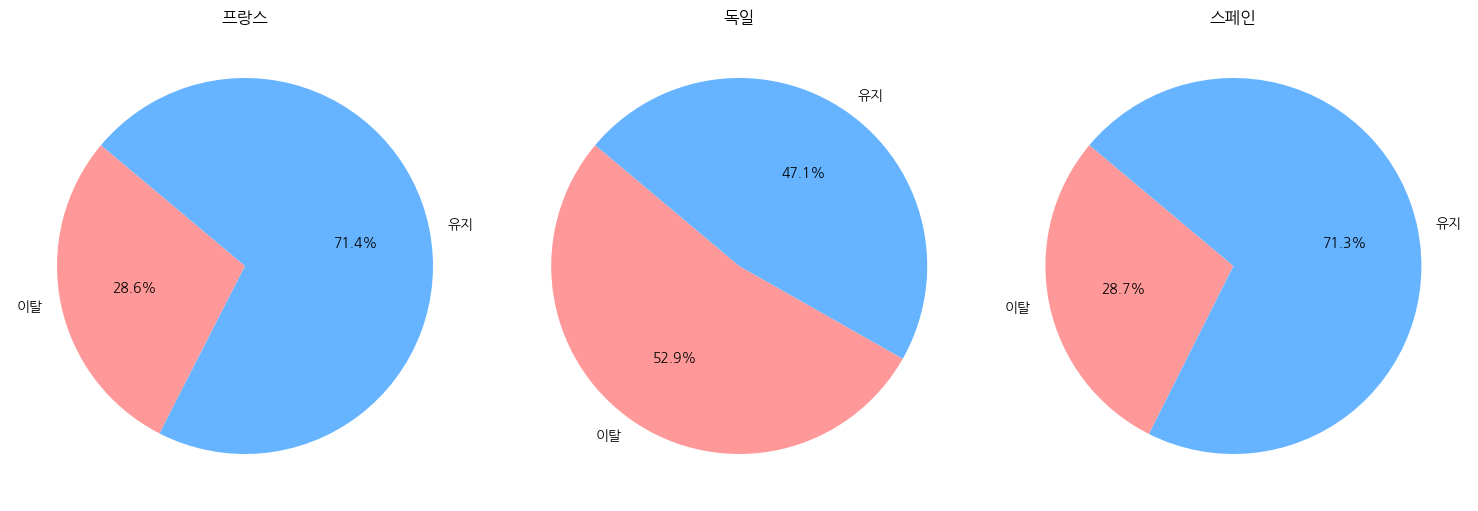

In [23]:
labels = ['Exited', 'Stayed']
france_sizes = [28.6, 71.4]  
germany_sizes = [52.9, 47.1] 
spain_sizes = [28.7, 71.3] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 프랑스 파이
axs[0].pie(france_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('프랑스')

# 독일 파이
axs[1].pie(germany_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('독일')

# 스페인 파이
axs[2].pie(spain_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('스페인')

plt.tight_layout()
plt.show()

In [24]:
France_stayeds = data_encoded[(data_encoded['Geography_France'] == True) & (data_encoded['Exited'] == 0)].shape[0]
France_exiteds = data_encoded[(data_encoded['Geography_France'] == True) & (data_encoded['Exited'] == 1)].shape[0]
Germany_stayeds = data_encoded[(data_encoded['Geography_Germany'] == True) & (data_encoded['Exited'] == 0)].shape[0]
Germany_exiteds = data_encoded[(data_encoded['Geography_Germany'] == True) & (data_encoded['Exited'] == 1)].shape[0]
Spain_stayeds = data_encoded[(data_encoded['Geography_Spain'] == True) & (data_encoded['Exited'] == 0)].shape[0]
Spain_exiteds = data_encoded[(data_encoded['Geography_Spain'] == True) & (data_encoded['Exited'] == 1)].shape[0]

print(France_stayeds)
print(France_exiteds)
print(Germany_stayeds)
print(Germany_exiteds)
print(Spain_stayeds)
print(Spain_exiteds)

print(calculate_Exited(France_stayeds,France_exiteds))
print(calculate_Stayed(France_stayeds,France_exiteds))
print(calculate_Exited(Germany_stayeds, Germany_exiteds))
print(calculate_Stayed(Germany_stayeds, Germany_exiteds))
print(calculate_Exited(Spain_stayeds, Spain_exiteds))
print(calculate_Stayed(Spain_stayeds, Spain_exiteds))

78643
15572
21492
13114
29978
6235
16.528153691025846
83.47184630897415
37.89516268855112
62.10483731144888
17.21757379946428
82.78242620053572


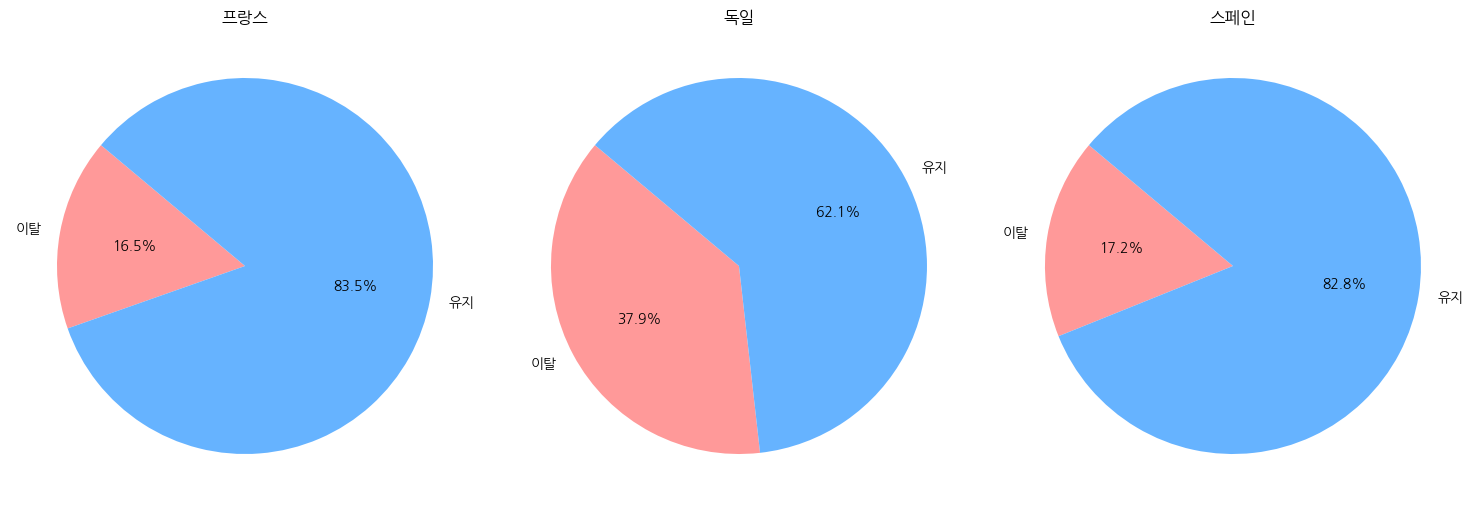

In [25]:
labels = ['Exited', 'Stayed']
france_sizess = [16.5, 83.5]  
germany_sizess = [37.9, 62.1] 
spain_sizess = [17.2, 82.8] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 프랑스 파이
axs[0].pie(france_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('프랑스')

# 독일 파이
axs[1].pie(germany_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('독일')

# 스페인 파이
axs[2].pie(spain_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('스페인')

plt.tight_layout()
plt.show()

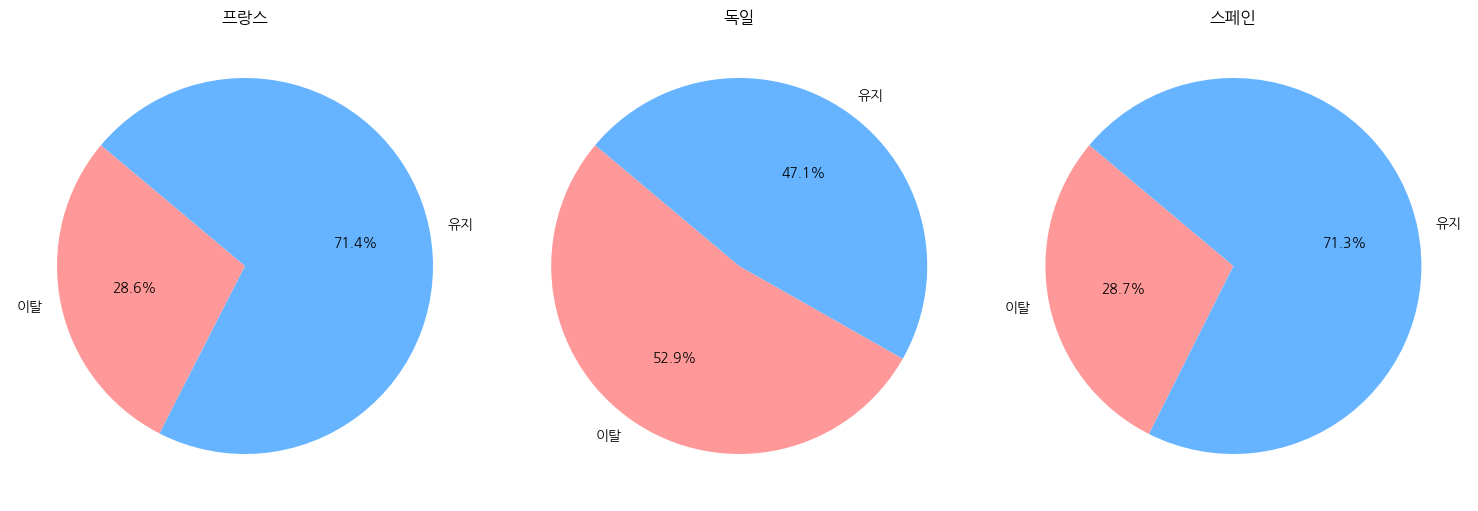

In [26]:
labels = ['Exited', 'Stayed']
france_sizes = [28.6, 71.4]  
germany_sizes = [52.9, 47.1] 
spain_sizes = [28.7, 71.3] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 프랑스 파이
axs[0].pie(france_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('프랑스')

# 독일 파이
axs[1].pie(germany_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('독일')

# 스페인 파이
axs[2].pie(spain_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('스페인')

plt.tight_layout()
plt.show()

이탈율 분석 결과:  
프랑스-> 28.6%  
독일-> 52.9%  
스페인-> 28.7%  

  독일의 이탈율이 프랑스와 스페인에 비해 압도적으로 높음 : 이는 50대 분석에서도 75.9%로 비슷한 현상으로 분석할 수 있음  
  확실히 **독일에 은행 이탈을 유도하는 사회 현상**이 있다는 걸 예측할 수 있음

## 40대와 성별 분석

<function matplotlib.pyplot.show(close=None, block=None)>

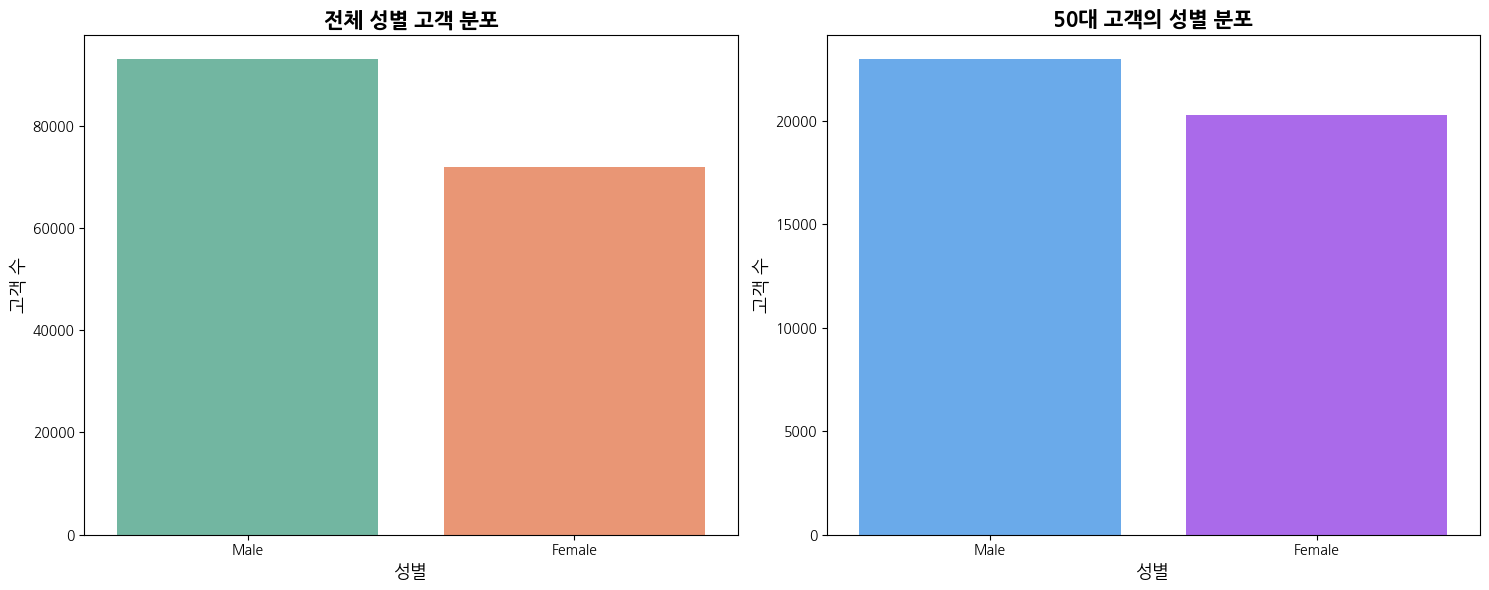

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='Gender', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 성별 고객 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('성별', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='Gender', data=data40, palette='cool', ax=axs[1])
axs[1].set_title('50대 고객의 성별 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('성별', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

plt.tight_layout()
plt.show

우선 성별은 40대와 전체와 데이터셋 비율이 비슷함

In [28]:
Male_stayed = data40_encoded[(data40_encoded['Gender_Male'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
Male_exited = data40_encoded[(data40_encoded['Gender_Male'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
Female_stayed = data40_encoded[(data40_encoded['Gender_Female'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
Female_exited = data40_encoded[(data40_encoded['Gender_Female'] == True) & (data40_encoded['Exited'] == 1)].shape[0]

print(Male_stayed)
print(Male_exited)
print(Female_stayed)
print(Female_exited)

16737
6276
11507
8799


In [29]:
print(calculate_Exited(Male_stayed, Male_exited))
print(calculate_Stayed(Male_stayed, Male_exited))
print(calculate_Exited(Female_stayed, Female_exited))
print(calculate_Stayed(Female_stayed, Female_exited))

27.27154217181593
72.72845782818406
43.33202009258347
56.66797990741653


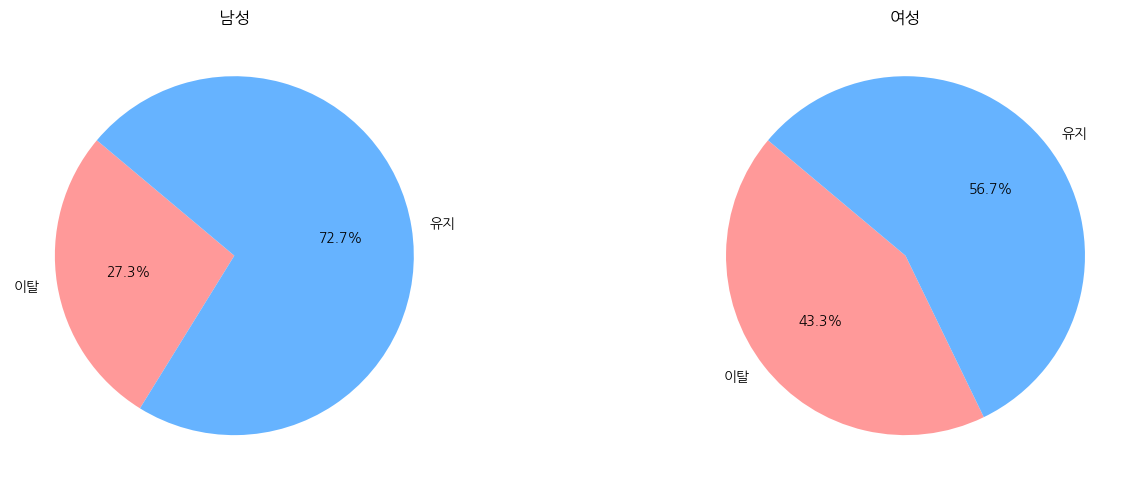

In [30]:
labels = ['Exited', 'Stayed']
male_sizes = [27.3, 72.7]  
female_sizes = [43.3, 56.7] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 남성 파이
axs[0].pie(male_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('남성')

# 여성 파이
axs[1].pie(female_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('여성')

plt.tight_layout()
plt.show()

In [31]:
Male_stayeds = data_encoded[(data_encoded['Gender_Male'] == True) & (data_encoded['Exited'] == 0)].shape[0]
Male_exiteds = data_encoded[(data_encoded['Gender_Male'] == True) & (data_encoded['Exited'] == 1)].shape[0]
Female_stayeds = data_encoded[(data_encoded['Gender_Female'] == True) & (data_encoded['Exited'] == 0)].shape[0]
Female_exiteds = data_encoded[(data_encoded['Gender_Female'] == True) & (data_encoded['Exited'] == 1)].shape[0]

print(calculate_Exited(Male_stayeds, Male_exiteds))
print(calculate_Stayed(Male_stayeds, Male_exiteds))
print(calculate_Exited(Female_stayeds, Female_exiteds))
print(calculate_Stayed(Female_stayeds, Female_exiteds))

15.90552871712292
84.09447128287708
27.96867174892883
72.03132825107117


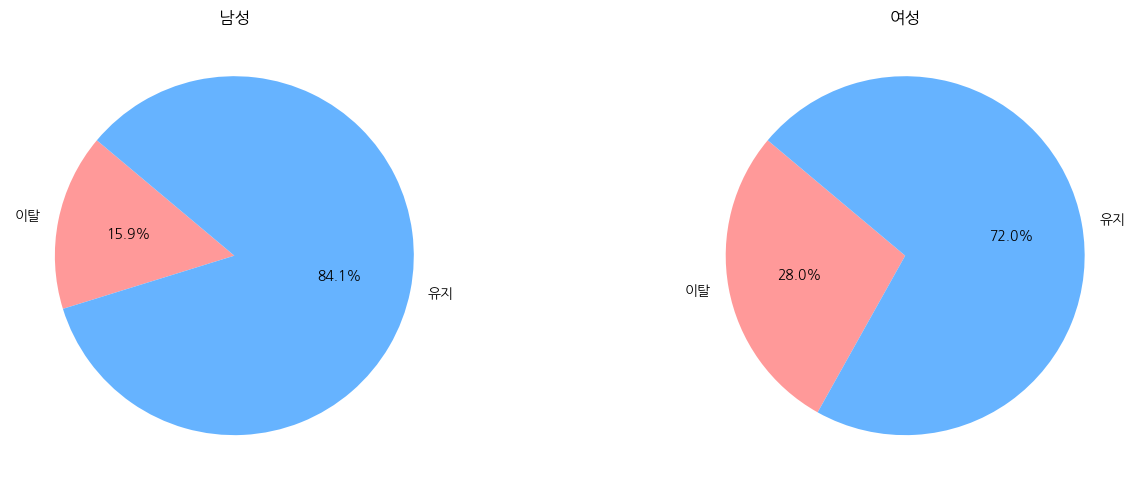

In [32]:
labels = ['Exited', 'Stayed']
male_sizess = [15.9, 84.1]  
female_sizess = [28.0, 72.0] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 남성 파이
axs[0].pie(male_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('남성')

# 여성 파이
axs[1].pie(female_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('여성')

plt.tight_layout()
plt.show()

이탈율 분석 결과:
남성 -> 27.3%
여성 -> 43.3%

남성보다 여성의 이탈율이 높은 모습을 보임  
이유 : ??

## 40대 active member 분석

<function matplotlib.pyplot.show(close=None, block=None)>

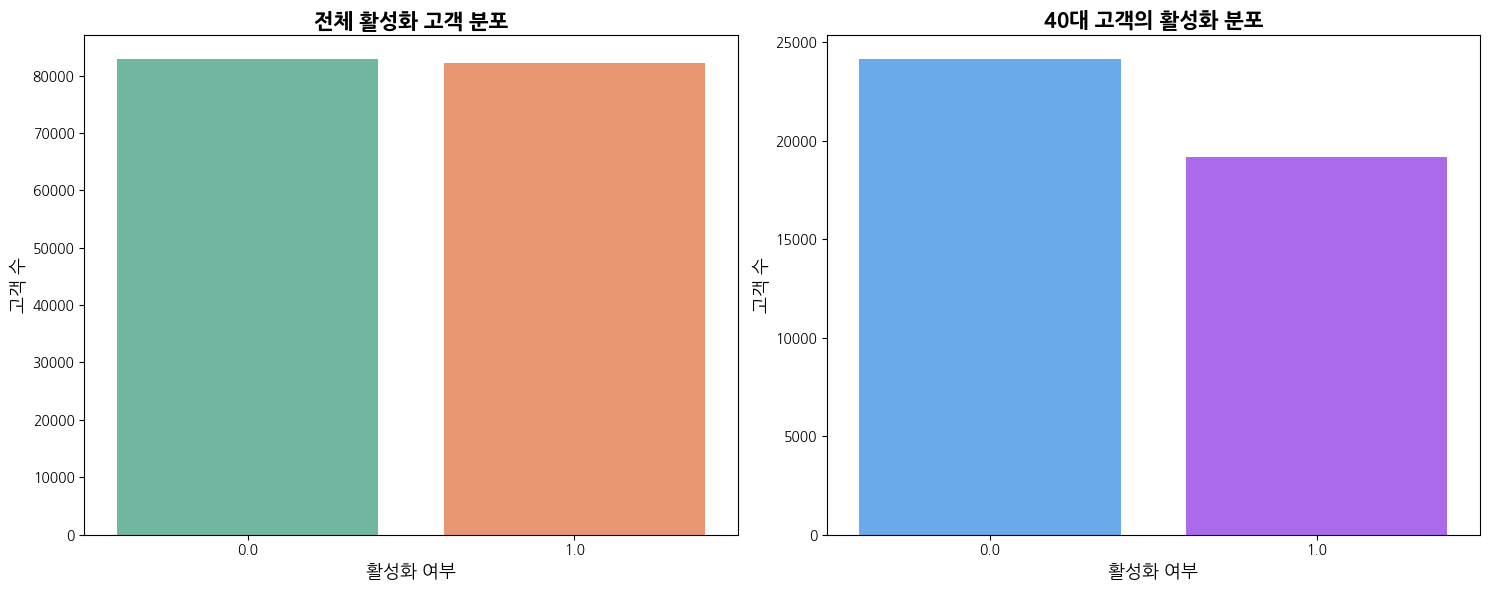

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='IsActiveMember', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 활성화 고객 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('활성화 여부', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='IsActiveMember', data=data40, palette='cool', ax=axs[1])
axs[1].set_title('40대 고객의 활성화 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('활성화 여부', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

plt.tight_layout()
plt.show

확실히 40대가 전체에 비해 활성화 비율이 높다는 것을 알 수 있음

In [34]:
noactive_stayed = data40_encoded[(data40_encoded['IsActiveMember_0.0'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
noactive_exited = data40_encoded[(data40_encoded['IsActiveMember_0.0'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
active_stayed = data40_encoded[(data40_encoded['IsActiveMember_1.0'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
active_exited = data40_encoded[(data40_encoded['IsActiveMember_1.0'] == True) & (data40_encoded['Exited'] == 1)].shape[0]

print(noactive_stayed)
print(noactive_exited)
print(active_stayed)
print(active_exited)

13042
11095
15202
3980


In [35]:
print(calculate_Exited(noactive_stayed, noactive_exited))
print(calculate_Stayed(noactive_stayed, noactive_exited))
print(calculate_Exited(active_stayed, active_exited))
print(calculate_Stayed(active_stayed, active_exited))

45.96677300410158
54.03322699589841
20.74861849650714
79.25138150349285


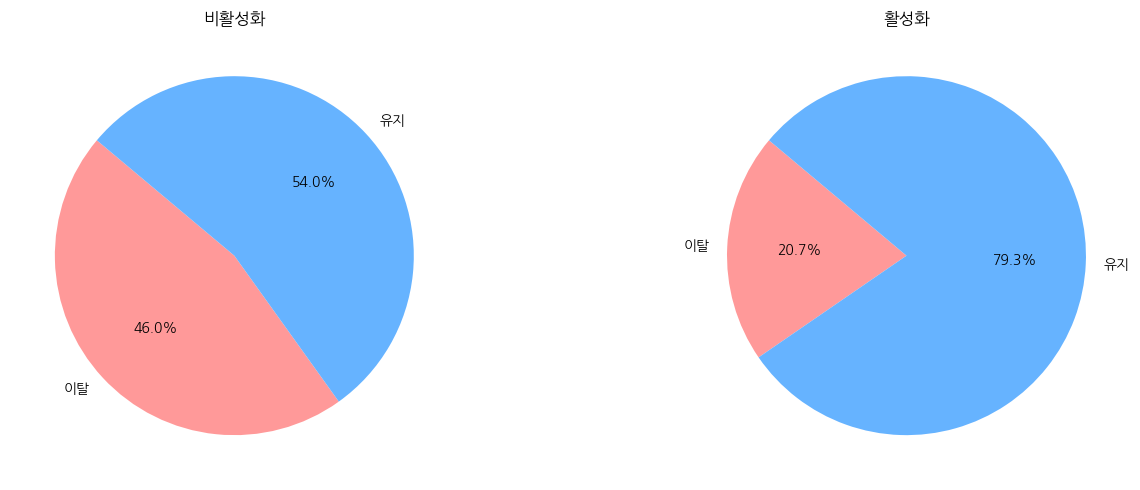

In [36]:
labels = ['Exited', 'Stayed']
noactive_sizes = [46.0, 54.0]  
active_sizes = [20.7, 79.3] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 남성 파이
axs[0].pie(noactive_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('비활성화')

# 여성 파이
axs[1].pie(active_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('활성화')

plt.tight_layout()
plt.show()

In [37]:
noactive_stayeds = data_encoded[(data_encoded['IsActiveMember_0.0'] == True) & (data_encoded['Exited'] == 0)].shape[0]
noactive_exiteds = data_encoded[(data_encoded['IsActiveMember_0.0'] == True) & (data_encoded['Exited'] == 1)].shape[0]
active_stayeds = data_encoded[(data_encoded['IsActiveMember_1.0'] == True) & (data_encoded['Exited'] == 0)].shape[0]
active_exiteds = data_encoded[(data_encoded['IsActiveMember_1.0'] == True) & (data_encoded['Exited'] == 1)].shape[0]

print(calculate_Exited(noactive_stayeds, noactive_exiteds))
print(calculate_Stayed(noactive_stayeds, noactive_exiteds))
print(calculate_Exited(active_stayeds, active_exiteds))
print(calculate_Stayed(active_stayeds, active_exiteds))

29.70863244254087
70.29136755745913
12.53454089520262
87.46545910479739


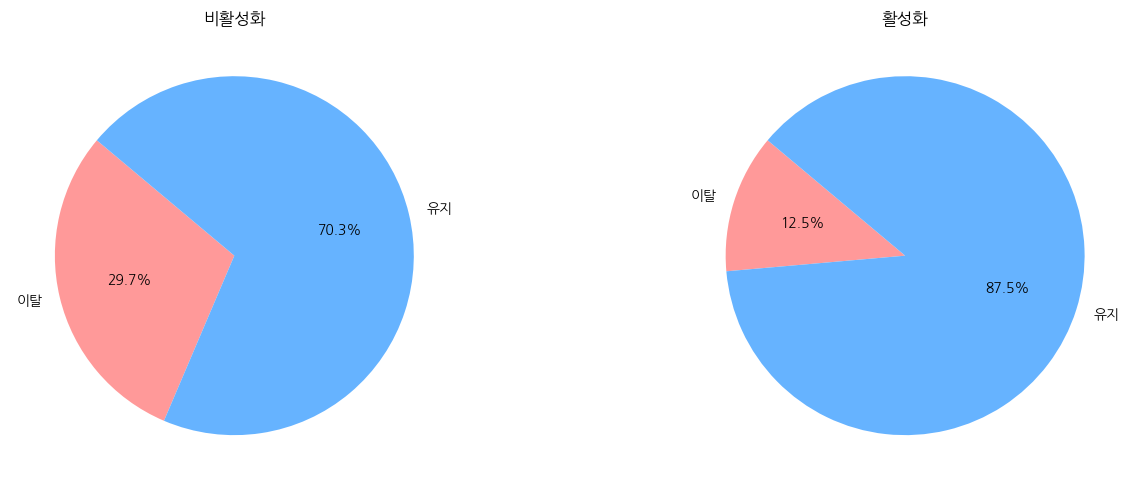

In [38]:
labels = ['Exited', 'Stayed']
noactive_sizess = [29.7, 70.3]  
active_sizess = [12.5, 87.5] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 남성 파이
axs[0].pie(noactive_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('비활성화')

# 여성 파이
axs[1].pie(active_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('활성화')

plt.tight_layout()
plt.show()

이탈율 분석 결과: 비활성화 -> 46%, 활성화 ->20.7%  
비활성화된 사람일수록 이탈율이 높은 것을 볼 수 있음

(특이사항) IsActiveMember는 40대에서 Exited 칼럼과 -0.26으로 상관관계가 높았음

## 40대 신용카드 분석

<function matplotlib.pyplot.show(close=None, block=None)>

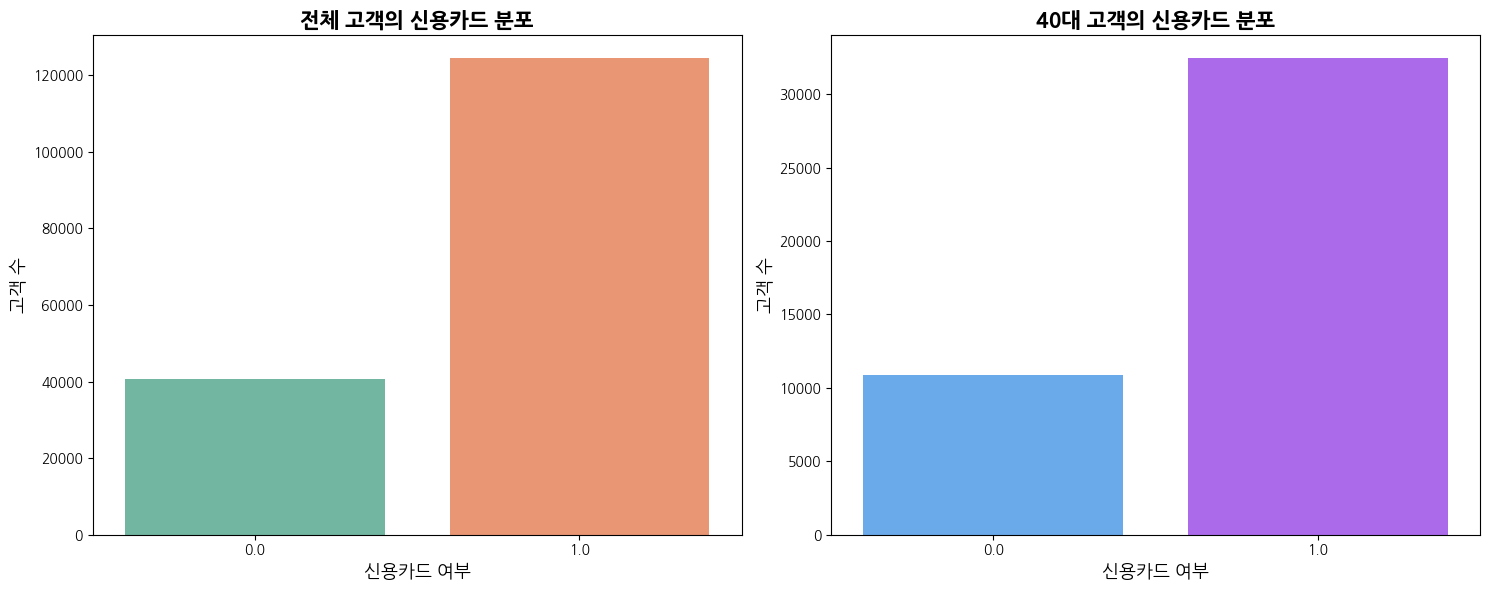

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='HasCrCard', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 고객의 신용카드 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('신용카드 여부', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='HasCrCard', data=data40, palette='cool', ax=axs[1])
axs[1].set_title('40대 고객의 신용카드 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('신용카드 여부', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

plt.tight_layout()
plt.show

이는 전체 비율과 비슷하다는 점을 알 수 있음

In [40]:
nocr_stayed = data40_encoded[(data40_encoded['HasCrCard_0.0'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
nocr_exited = data40_encoded[(data40_encoded['HasCrCard_0.0'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
cr_stayed = data40_encoded[(data40_encoded['HasCrCard_1.0'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
cr_exited = data40_encoded[(data40_encoded['HasCrCard_1.0'] == True) & (data40_encoded['Exited'] == 1)].shape[0]

print(nocr_stayed)
print(nocr_exited)
print(cr_stayed)
print(cr_exited)

7063
3828
21181
11247


In [41]:
print(calculate_Exited(nocr_stayed, nocr_exited))
print(calculate_Stayed(nocr_stayed, nocr_exited))
print(calculate_Exited(cr_stayed, cr_exited))
print(calculate_Stayed(cr_stayed, cr_exited))

35.148287576898355
64.85171242310165
34.68299000863451
65.31700999136548


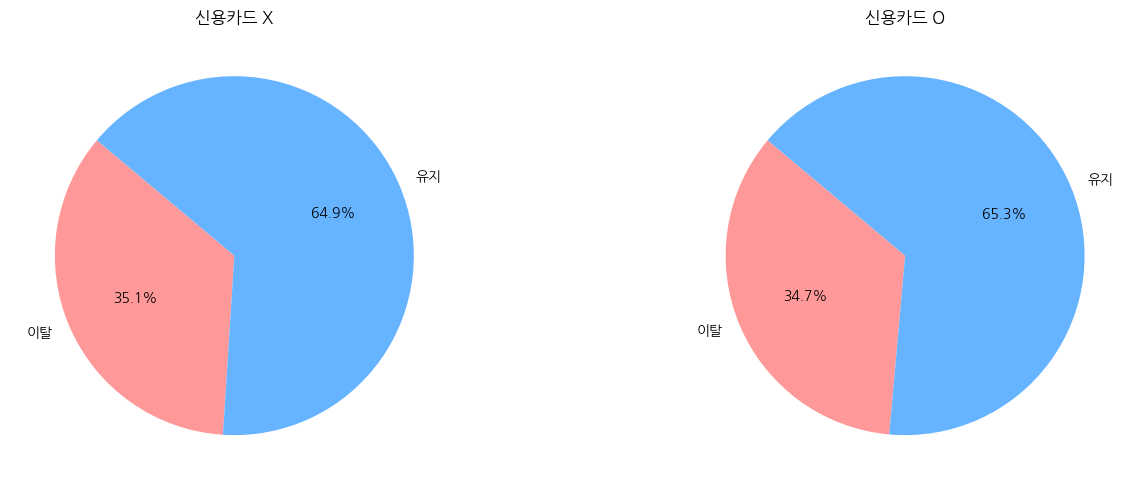

In [42]:
labels = ['Exited', 'Stayed']
nocr_sizes = [35.1, 64.9]  
cr_sizes = [34.7, 65.3] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 남성 파이
axs[0].pie(nocr_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('신용카드 X')

# 여성 파이
axs[1].pie(cr_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('신용카드 O')

plt.tight_layout()
plt.show()

In [43]:
nocr_stayeds = data_encoded[(data_encoded['HasCrCard_0.0'] == True) & (data_encoded['Exited'] == 0)].shape[0]
nocr_exiteds = data_encoded[(data_encoded['HasCrCard_0.0'] == True) & (data_encoded['Exited'] == 1)].shape[0]
cr_stayeds = data_encoded[(data_encoded['HasCrCard_1.0'] == True) & (data_encoded['Exited'] == 0)].shape[0]
cr_exiteds = data_encoded[(data_encoded['HasCrCard_1.0'] == True) & (data_encoded['Exited'] == 1)].shape[0]

print(calculate_Exited(nocr_stayeds, nocr_exited))
print(calculate_Stayed(nocr_stayeds, nocr_exited))
print(calculate_Exited(cr_stayeds, cr_exited))
print(calculate_Stayed(cr_stayeds, cr_exited))

10.875308957640842
89.12469104235916
10.225568011346589
89.77443198865342


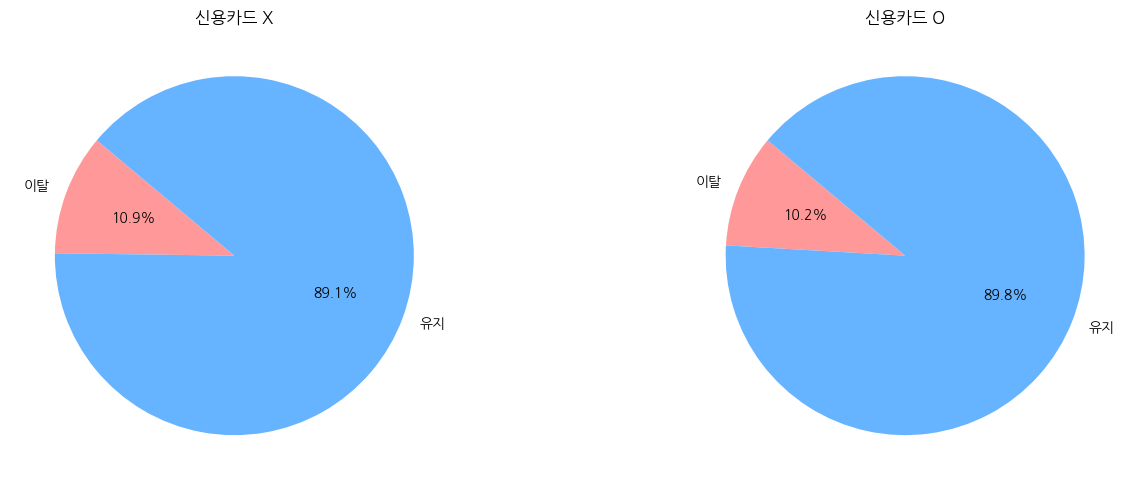

In [44]:
labels = ['Exited', 'Stayed']
nocr_sizess = [10.9, 89.1]  
cr_sizess = [10.2, 89.8] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 남성 파이
axs[0].pie(nocr_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('신용카드 X')

# 여성 파이
axs[1].pie(cr_sizess, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('신용카드 O')

plt.tight_layout()
plt.show()

이탈율 분석 결과: 신용카드X -> 35.1%, 신용카드o ->34.7%

  40대에서 신용카드 보유 여부와는 딱히 관련이 없어 보임

## 40대 은행 상품 수 분석

<function matplotlib.pyplot.show(close=None, block=None)>

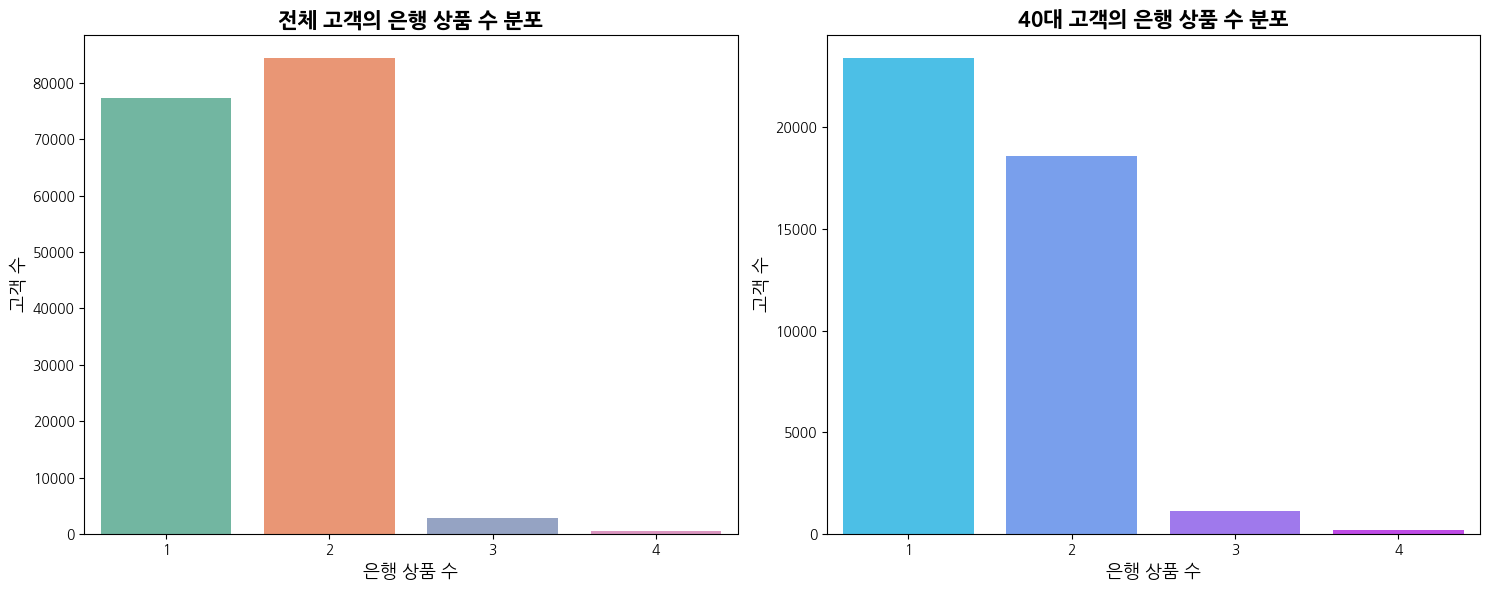

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='NumOfProducts', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 고객의 은행 상품 수 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('은행 상품 수', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='NumOfProducts', data=data40, palette='cool', ax=axs[1])
axs[1].set_title('40대 고객의 은행 상품 수 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('은행 상품 수', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

plt.tight_layout()
plt.show

특이점은 전체의 분포에 비해 40대가 은행 상품 수가 1개가 2개보다 많다는 점?

In [46]:
pro1_stayed = data40_encoded[(data40_encoded['NumOfProducts_1'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
pro1_exited = data40_encoded[(data40_encoded['NumOfProducts_1'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
pro2_stayed = data40_encoded[(data40_encoded['NumOfProducts_2'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
pro2_exited = data40_encoded[(data40_encoded['NumOfProducts_2'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
pro3_stayed = data40_encoded[(data40_encoded['NumOfProducts_3'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
pro3_exited = data40_encoded[(data40_encoded['NumOfProducts_3'] == True) & (data40_encoded['Exited'] == 1)].shape[0]
pro4_stayed = data40_encoded[(data40_encoded['NumOfProducts_4'] == True) & (data40_encoded['Exited'] == 0)].shape[0]
pro4_exited = data40_encoded[(data40_encoded['NumOfProducts_4'] == True) & (data40_encoded['Exited'] == 1)].shape[0]

print(pro1_stayed)
print(pro1_exited)
print(pro2_stayed)
print(pro2_exited)
print(pro3_stayed)
print(pro3_exited)
print(pro4_stayed)
print(pro4_exited)

11619
11744
16513
2084
88
1057
24
190


In [47]:
print(calculate_Exited(pro1_stayed, pro1_exited))
print(calculate_Stayed(pro1_stayed, pro1_exited))
print(calculate_Exited(pro2_stayed, pro2_exited))
print(calculate_Stayed(pro2_stayed, pro2_exited))
print(calculate_Exited(pro3_stayed, pro3_exited))
print(calculate_Stayed(pro3_stayed, pro3_exited))
print(calculate_Exited(pro4_stayed, pro4_exited))
print(calculate_Stayed(pro4_stayed, pro4_exited))

50.267517014082095
49.732482985917905
11.206108512125612
88.79389148787439
92.31441048034934
7.685589519650655
88.78504672897196
11.214953271028037


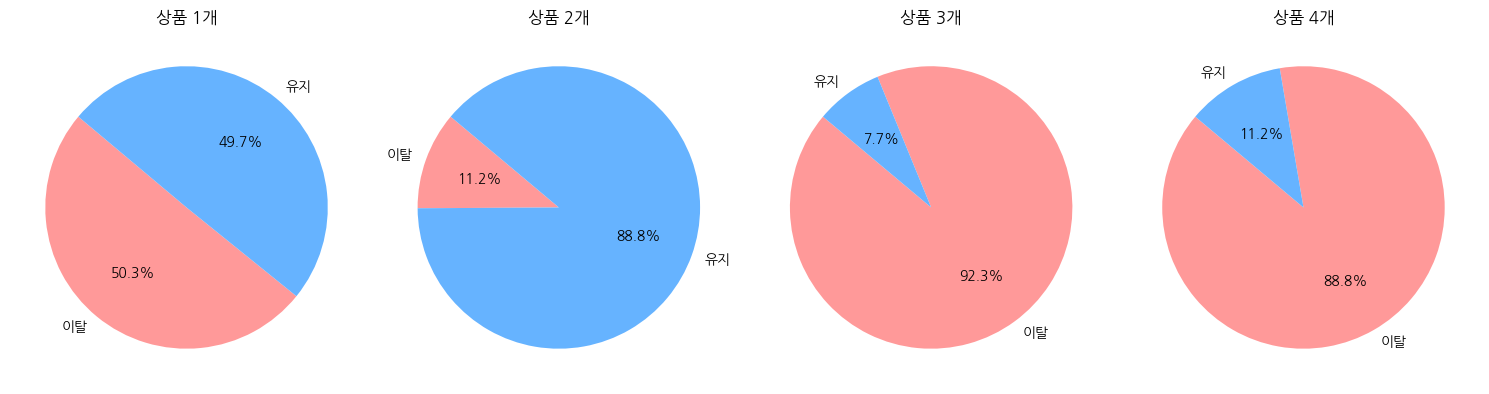

In [48]:
labels = ['Exited', 'Stayed']
pro1_sizes = [50.3, 49.7] 
pro2_sizes = [11.2, 88.8]
pro3_sizes = [92.3, 7.69]
pro4_sizes = [88.8, 11.2]
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# 남성 파이
axs[0].pie(pro1_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('상품 1개')

# 여성 파이
axs[1].pie(pro2_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('상품 2개')

axs[2].pie(pro3_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('상품 3개')

axs[3].pie(pro4_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[3].set_title('상품 4개')

plt.tight_layout()
plt.show()

상품 1개 : 50.3%  
상품 2개 : 11.2%  
상품 3개 : 92.3%  
상품 4개 : 88.8%  
?? 전체에 대한 분석도 해야 될 거 같다

In [49]:
data_encoded = pd.get_dummies(df, columns=['Geography',
                                      'Gender',
                                      'IsActiveMember',
                                      'HasCrCard',
                                      'NumOfProducts'])
# Tenure는 너무 많아서 제외
data_encoded.head()

,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,Okwudilichukwu,668,33.0,3,0.00,181449.97,0,True,False,False,False,True,True,False,False,True,False,True,False,False
1,Okwudiliolisa,627,33.0,1,0.00,49503.50,0,True,False,False,False,True,False,True,False,True,False,True,False,False
2,Hsueh,678,40.0,10,0.00,184866.69,0,True,False,False,False,True,True,False,False,True,False,True,False,False
3,Kao,581,34.0,2,148882.54,84560.88,0,True,False,False,False,True,False,True,False,True,True,False,False,False
4,Chiemenam,716,33.0,5,0.00,15068.83,0,False,False,True,False,True,False,True,False,True,False,True,False,False


In [50]:
pro1_stayeds = data_encoded[(data_encoded['NumOfProducts_1'] == True) & (data_encoded['Exited'] == 0)].shape[0]
pro1_exiteds = data_encoded[(data_encoded['NumOfProducts_1'] == True) & (data_encoded['Exited'] == 1)].shape[0]
pro2_stayeds = data_encoded[(data_encoded['NumOfProducts_2'] == True) & (data_encoded['Exited'] == 0)].shape[0]
pro2_exiteds = data_encoded[(data_encoded['NumOfProducts_2'] == True) & (data_encoded['Exited'] == 1)].shape[0]
pro3_stayeds = data_encoded[(data_encoded['NumOfProducts_3'] == True) & (data_encoded['Exited'] == 0)].shape[0]
pro3_exiteds = data_encoded[(data_encoded['NumOfProducts_3'] == True) & (data_encoded['Exited'] == 1)].shape[0]
pro4_stayeds = data_encoded[(data_encoded['NumOfProducts_4'] == True) & (data_encoded['Exited'] == 0)].shape[0]
pro4_exiteds = data_encoded[(data_encoded['NumOfProducts_4'] == True) & (data_encoded['Exited'] == 1)].shape[0]

print(pro1_stayeds)
print(pro1_exiteds)
print(pro2_stayeds)
print(pro2_exiteds)
print(pro3_stayeds)
print(pro3_exiteds)
print(pro4_stayeds)
print(pro4_exiteds)

50516
26858
79198
5093
340
2554
59
416


In [51]:
print(calculate_Exited(pro1_stayeds, pro1_exiteds))
print(calculate_Stayed(pro1_stayeds, pro1_exiteds))
print(calculate_Exited(pro2_stayeds, pro2_exiteds))
print(calculate_Stayed(pro2_stayeds, pro2_exiteds))
print(calculate_Exited(pro3_stayeds, pro3_exiteds))
print(calculate_Stayed(pro3_stayeds, pro3_exiteds))
print(calculate_Exited(pro4_stayeds, pro4_exiteds))
print(calculate_Stayed(pro4_stayeds, pro4_exiteds))

34.71191873239072
65.28808126760927
6.0421634575458825
93.95783654245412
88.25155494125777
11.748445058742226
87.57894736842105
12.421052631578949


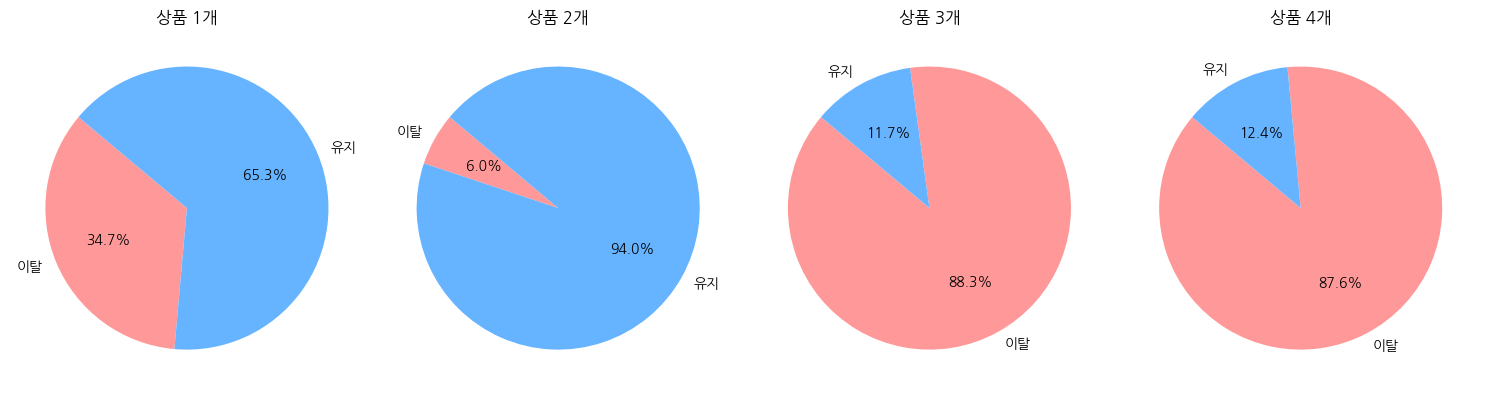

In [52]:
labels = ['Exited', 'Stayed']
pro1s_sizes = [34.7, 65.3] 
pro2s_sizes = [6.0, 94.0]
pro3s_sizes = [88.3, 11.7]
pro4s_sizes = [87.6, 12.4]
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# 남성 파이
axs[0].pie(pro1s_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('상품 1개')

# 여성 파이
axs[1].pie(pro2s_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('상품 2개')

axs[2].pie(pro3s_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('상품 3개')

axs[3].pie(pro4s_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[3].set_title('상품 4개')

plt.tight_layout()
plt.show()

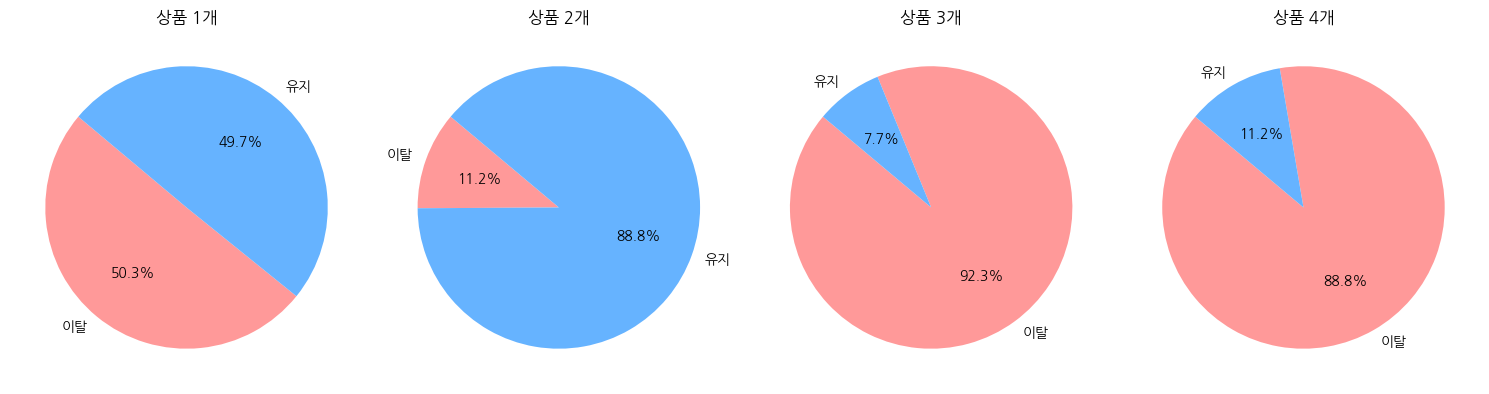

In [53]:
labels = ['Exited', 'Stayed']
pro1_sizes = [50.3, 49.7] 
pro2_sizes = [11.2, 88.8]
pro3_sizes = [92.3, 7.69]
pro4_sizes = [88.8, 11.2]
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# 남성 파이
axs[0].pie(pro1_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('상품 1개')

# 여성 파이
axs[1].pie(pro2_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('상품 2개')

axs[2].pie(pro3_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('상품 3개')

axs[3].pie(pro4_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[3].set_title('상품 4개')

plt.tight_layout()
plt.show()

그냥 원래 데이터셋이 그런 거였다.  
근데 상품 1개에선 좀 차이가 있다.  
전체 이탈율 : 34.7%, 40대 이탈율 : 50.3%  
(특이사항) NumOfProducts는 상관관계가 높은 칼럼이었음

## 40대와 Tenure 분석

<function matplotlib.pyplot.show(close=None, block=None)>

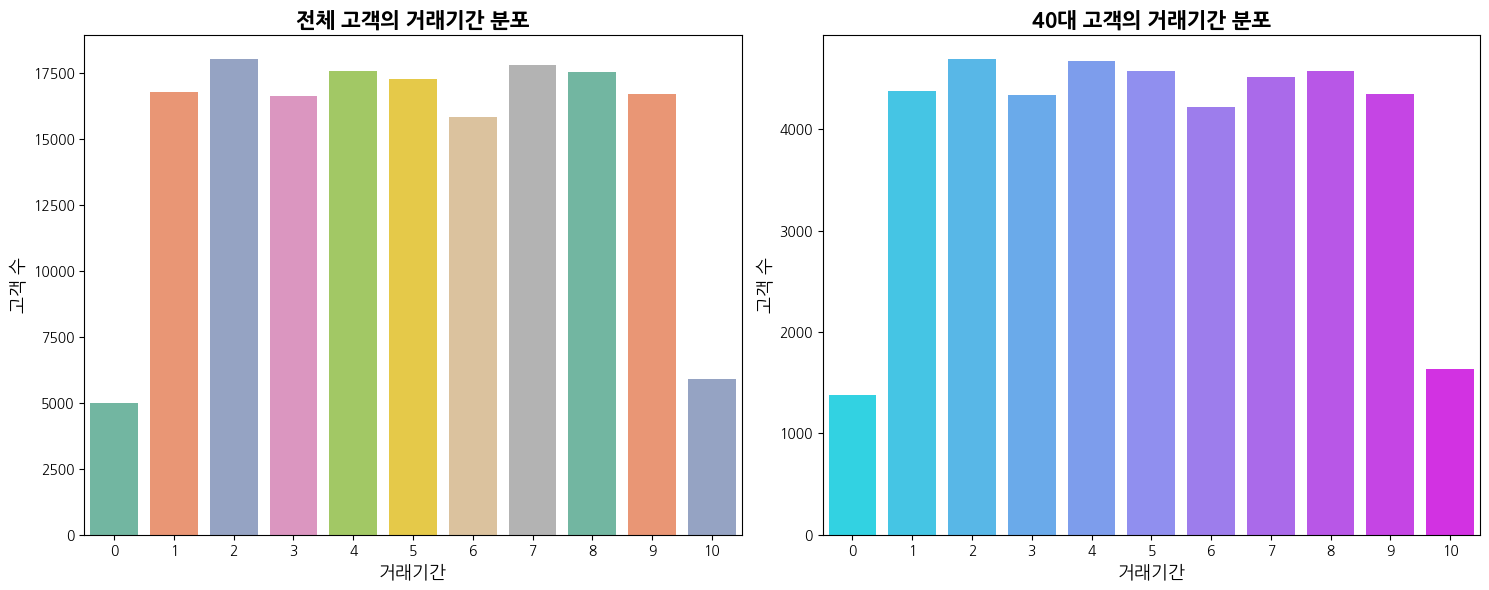

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='Tenure', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 고객의 거래기간 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('거래기간', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='Tenure', data=data40, palette='cool', ax=axs[1])
axs[1].set_title('40대 고객의 거래기간 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('거래기간', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

plt.tight_layout()
plt.show

## 40대와 Balance 분석

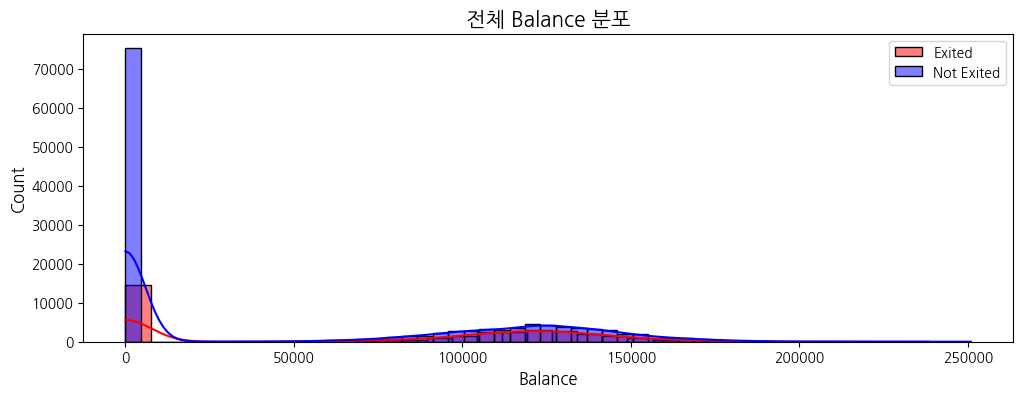

In [55]:
# 이탈자와 비이탈자를 구분하여 데이터 분리
exited_datas = df[df['Exited'] == 1]
not_exited_datas = df[df['Exited'] == 0]

plt.figure(figsize=(12, 4))

sns.histplot(exited_datas['Balance'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_datas['Balance'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('전체 Balance 분포', fontsize=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

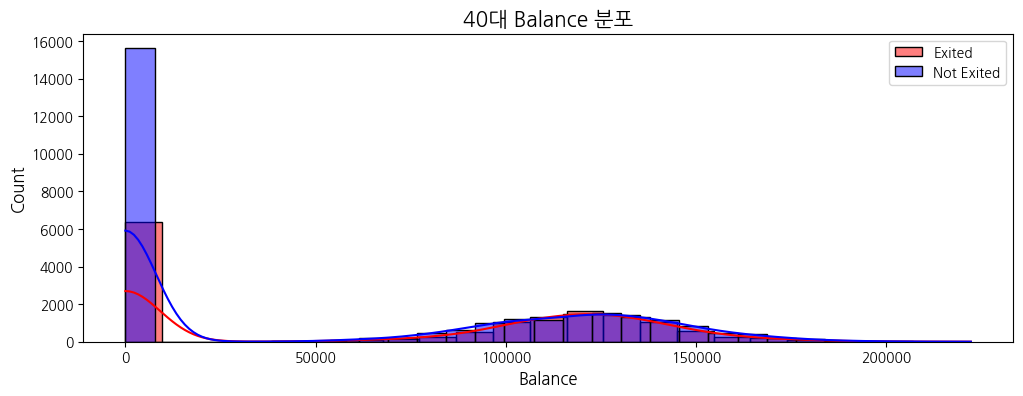

In [56]:
# 이탈자와 비이탈자를 구분하여 데이터 분리
exited_data = data40[data40['Exited'] == 1]
not_exited_data = data40[data40['Exited'] == 0]

# CreditScore 분포 시각화
plt.figure(figsize=(12, 4))

sns.histplot(exited_data['Balance'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_data['Balance'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('40대 Balance 분포', fontsize=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

0인 부근에 데이터셋이 압도적으로 많은 걸 알 수 있음 (이건 전체 데이터 분포도 동일)  
비율만 보면 40대가 0 부근에서 이탈율이 더 높긴 한데 인사이트를 얻긴 힘듦  
100000-150000에선 가우시안 분포를 이룸

## 40대와 CreditScore 분석

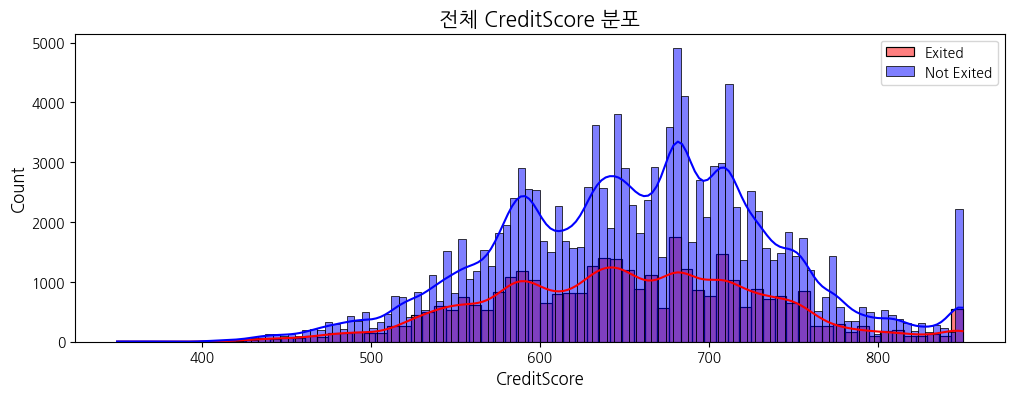

In [57]:
plt.figure(figsize=(12, 4))

sns.histplot(exited_datas['CreditScore'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_datas['CreditScore'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('전체 CreditScore 분포', fontsize=15)
plt.xlabel('CreditScore', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

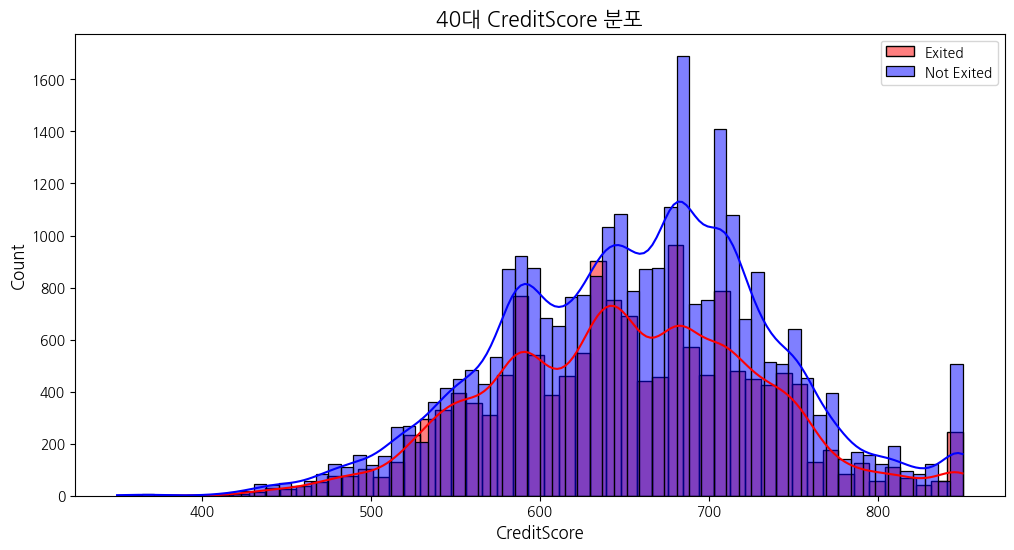

In [58]:
# CreditScore 분포 시각화
plt.figure(figsize=(12, 6))

sns.histplot(exited_data['CreditScore'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_data['CreditScore'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('40대 CreditScore 분포', fontsize=15)
plt.xlabel('CreditScore', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

## 40대와 EstimatedSalary 분석

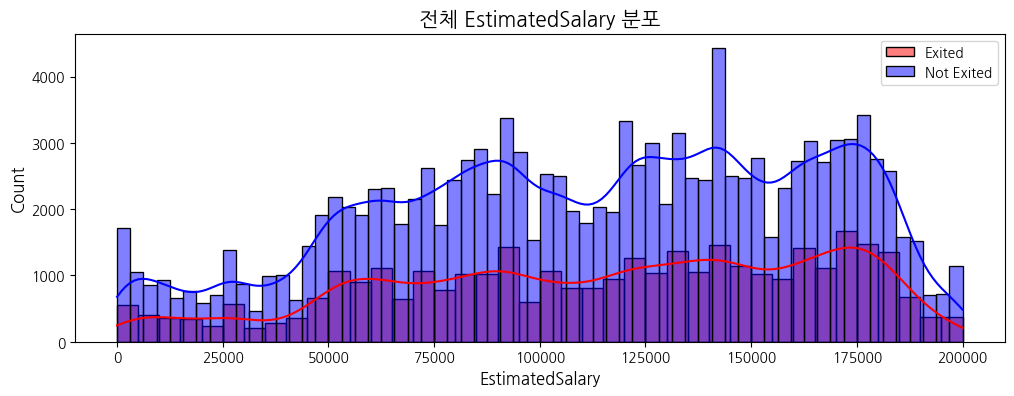

In [59]:
plt.figure(figsize=(12, 4))

sns.histplot(exited_datas['EstimatedSalary'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_datas['EstimatedSalary'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('전체 EstimatedSalary 분포', fontsize=15)
plt.xlabel('EstimatedSalary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

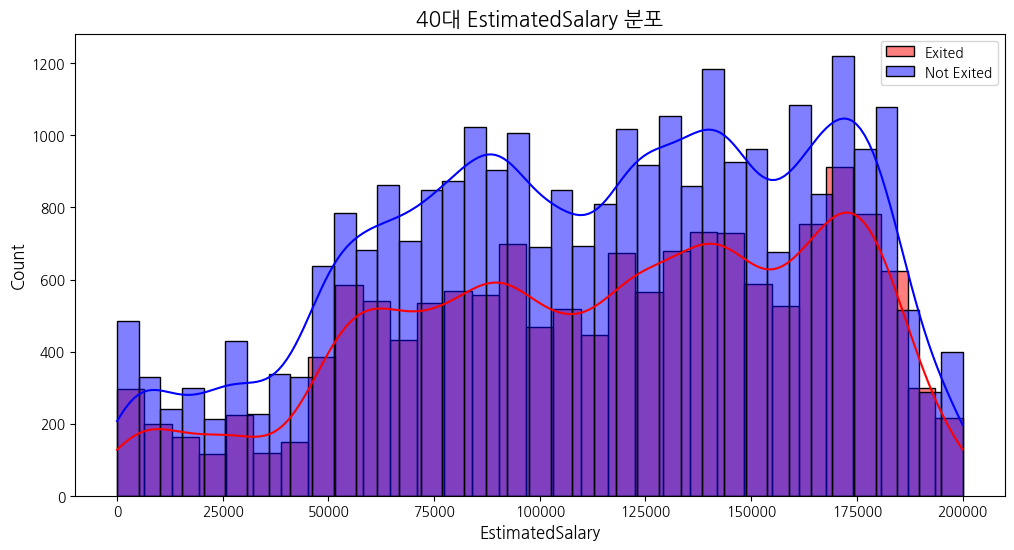

In [60]:
plt.figure(figsize=(12, 6))

sns.histplot(exited_data['EstimatedSalary'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_data['EstimatedSalary'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('40대 EstimatedSalary 분포', fontsize=15)
plt.xlabel('EstimatedSalary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

## 이표본 t 검정 (Two-sample t-Test)

종속변수에 대해 각 독립변수가 통계적으로 유의한 결과를 보이는지에 대해 검정  
표본의 크기가 크기 때문에 중심극한정리에 의해 정규성을 가진다고 가정  

In [70]:
data40_0=data40.loc[(data40['Exited']==0),['CreditScore','Tenure','Balance']].reset_index(drop=True)
data40_1=data40.loc[(data40['Exited']==1),['CreditScore','Tenure','Balance']].reset_index(drop=True)

In [72]:
from scipy import stats

t, p=stats.ttest_ind(data40_0.CreditScore,data40_1.CreditScore)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.0


In [73]:
t, p=stats.ttest_ind(data40_0.Tenure,data40_1.Tenure)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.0


In [74]:
t, p=stats.ttest_ind(data40_0.Balance,data40_1.Balance)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.0
